<a href="https://colab.research.google.com/github/8Mind/simple-MNIST/blob/main/simple_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Timer

import time
start_time = time.time()
print("Notebook execution started...")

Notebook execution started...


In [2]:
### Imports

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
### Use GPU if available

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device.')

Using cuda device.


In [4]:
### Define a transformation to convert the images to tensors

transform = transforms.ToTensor()

In [5]:
### Download and load training data

train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           download=True,
                                           transform=transform)
### Download and load test data

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          download=True,
                                          transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 477kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.43MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.89MB/s]


In [6]:
### Extract images and labels, convert their dtypes, and put them on device

X_train = train_dataset.data.float().to(device)
y_train = train_dataset.targets.to(device)
X_test = test_dataset.data.float().to(device)
y_test = test_dataset.targets.to(device)

In [7]:
### Check shapes

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print("\nSo there are 60,000 train images and 10,000 test images, each of shape (28,28).")

X_train shape: torch.Size([60000, 28, 28]), y_train shape: torch.Size([60000])
X_test shape: torch.Size([10000, 28, 28]), y_test shape: torch.Size([10000])

So there are 60,000 train images and 10,000 test images, each of shape (28,28).


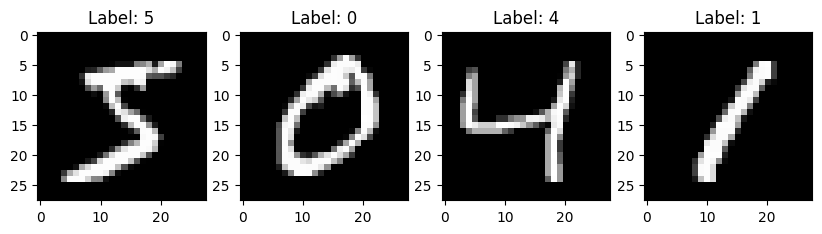

In [8]:
### Plot a few MNIST images

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train.cpu()[i], cmap='gray')
    plt.title(f'Label: {y_train.cpu()[i]}')

In [9]:
### Write a function which, given some image, returns the index of the training
### image that is "closest" to it (with respect to the Euclidean-distance).

def closest_train_image(img: torch.Tensor()):
  # the expected shape of `img` is (28,28):
  assert img.shape == (28,28)
  # compute the difference between the input image and all train images
  diff = img - X_train # broadcasts over the zeroth index so the shape of `diff`
                       # is (60000,28,28)
  # calculate the Euclidean distances
  dists = torch.linalg.norm(diff, dim=(1, 2)) # computes the Euclidean norm of
                                              # `diff` over the (28,28) shape
  # return the index responsible for the smallest distance
  # (i.e. the index of the closest image)
  return torch.argmin(dists)

In [10]:
### Make predictions for X_test using the label of the closest train image

# for each image in X_test find the index of train image that is most similar to it
idx = [closest_train_image(img) for img in X_test]

# use the label of this "most similar image" as the prediction
y_preds = torch.tensor([y_train[i] for i in idx], device=device)

In [11]:
### Compute the accuracy of prediction

acc = (y_preds==y_test).sum()/len(y_preds)
print(f'The accuracy of prediction is {(acc * 100):.2f}%.')

The accuracy of prediction is 96.91%.


In [12]:
### How long does it take?

end_time = time.time()
duration = end_time - start_time
print(f"Notebook execution finished in {duration:.2f} seconds.")

Notebook execution finished in 42.03 seconds.
